In [1]:
# 그래프 출력 관련 설정
# 아래 코드는 그래프를 그리고 싶을때 그대로 가져다가 한번 실행시켜주면 편합니다.
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

sns.set_style("darkgrid")

%config InlineBackend.figure_format = 'retina'
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 표시 문제
mpl.rcParams['figure.figsize'] = (15,8)
	
# 한글 폰트 설정
path = 'data/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
# fm._rebuild() => Colab에서는 이 코드도 실행해주세요

In [2]:
# 엑셀 등의 데이터를 편리하게 다룰수 있는 pandas 라이브러리
import pandas as pd
import numpy as np

In [3]:
# pandas의 read_csv 함수를 사용해서 'data.csv' 파일을 읽어옵니다.
# 'data.csv'데이터는 한국거래소(KRX)에서 가져온 코스피200 데이터 입니다.
코스피200 = pd.read_csv('data/data.csv', encoding='cp949')

In [4]:
# 데이터가 어떻게 구성되어있는지 3개만 확인해보겠습니다
코스피200.head(3)

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
0,2022/10/05,289.05,0.78,0.27,293.87,294.47,287.44,138907.0,7289051.0,1.528199e+09
1,2022/10/04,288.27,6.91,2.46,286.25,288.96,285.42,120019.0,6053599.0,1.522329e+09
2,2022/09/30,281.36,-1.29,-0.46,281.75,284.35,278.39,143738.0,6233068.0,1.485352e+09


In [5]:
# 결측치(셀에 값이 없음)를 제거합니다.
코스피200 = 코스피200.dropna()

# 데이터를 그대로 뿌리면, 최근일자부터 그래프가 그려져서
# 일자별로 정렬해서 데이터프레임을 다시 저장했습니다.
코스피200 = 코스피200.sort_values('일자')

In [6]:
# 그래프의 x축에 쓸 글자(라벨) 만들기
label_x = 코스피200['일자'].loc[[ i for i in range(0, len(코스피200), 365) ]].to_list()

In [7]:
# 이동평균을 계산해 넣을빈 컬럼 추가해주기, 일부러 결측치(np.nan, 값이 없음을 의미)를 넣어줬습니다.
코스피200['MA5'] = np.nan
코스피200['MA20'] = np.nan
코스피200['MA60'] = np.nan
코스피200['MA120'] = np.nan
코스피200.head(3)

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,MA5,MA20,MA60,MA120
5269,2001/06/11,75.27,-1.92,-2.49,75.95,76.33,75.17,197161.0,1274272.0,187964063.0,NaN,NaN,NaN,NaN
5268,2001/06/12,75.08,-0.19,-0.25,74.89,75.78,74.69,174177.0,1063817.0,187535215.0,NaN,NaN,NaN,NaN
5267,2001/06/13,75.90,0.82,1.09,75.70,75.90,75.08,210674.0,1328703.0,189565444.0,NaN,NaN,NaN,NaN


In [8]:
# rolling(window=5) 의 결과로 5개 행에서 종가를 가져오고
# mean 함수로 평균을 구합니다.
코스피200['MA5'] = 코스피200['종가'].rolling(window=5).mean()

# 위에서 숫자만 바꿔서 나머지 컬럼도 채워줍니다.
코스피200['MA20'] = 코스피200['종가'].rolling(window=20).mean()
코스피200['MA60'] = 코스피200['종가'].rolling(window=60).mean()
코스피200['MA120'] = 코스피200['종가'].rolling(window=120).mean()

# 120일 이동평균까지 잘 채워졌는지 확인하기 위해
# iloc(integer-location) 함수를 사용해서 115번째 행부터 121번째 행까지 뿌려보겠습니다.
코스피200.iloc[115:122]

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,MA5,MA20,MA60,MA120
5154,2001/11/26,84.20,3.65,4.53,81.74,84.20,81.70,517480.0,3547509.0,217939890.0,79.144,73.3125,66.745667,NaN
5153,2001/11/27,83.65,-0.55,-0.65,84.16,85.02,82.53,550560.0,3403404.0,216481405.0,80.546,74.1960,66.976333,NaN
5152,2001/11/28,78.77,-4.88,-5.83,82.57,82.99,78.58,509323.0,2661673.0,203852464.0,80.990,74.8125,67.165500,NaN
5151,2001/11/29,78.07,-0.70,-0.89,77.75,79.85,76.67,465534.0,2646903.0,199899810.0,81.048,75.3540,67.349167,NaN
5150,2001/11/30,80.03,1.96,2.51,80.37,80.78,79.61,624900.0,2957298.0,204825658.0,80.944,75.9510,67.529333,68.961417
5149,2001/12/03,80.83,0.80,1.00,79.96,81.28,78.32,741614.0,2978154.0,209297036.0,80.270,76.5160,67.739167,69.007750
5148,2001/12/04,80.78,-0.05,-0.06,80.56,81.59,79.72,688822.0,3047897.0,209091104.0,79.696,77.0535,67.948333,69.055250


In [9]:
# 일자를 기준으로 컬럼의 lineplot을 그려주는 함수 만들기
# 여기에 이동평균도 추가해보겠습니다.
def show_graph(column_name, str_date):
    sub_data = 코스피200[코스피200['일자'] >= str_date]

    sns.lineplot(x=sub_data['일자'], y=sub_data[column_name], linewidth=5)
    sns.lineplot(x=sub_data['일자'], y=sub_data['MA5'], linewidth=1)
    sns.lineplot(x=sub_data['일자'], y=sub_data['MA20'], linewidth=1)
    sns.lineplot(x=sub_data['일자'], y=sub_data['MA60'], linewidth=1)
    sns.lineplot(x=sub_data['일자'], y=sub_data['MA120'], linewidth=1)

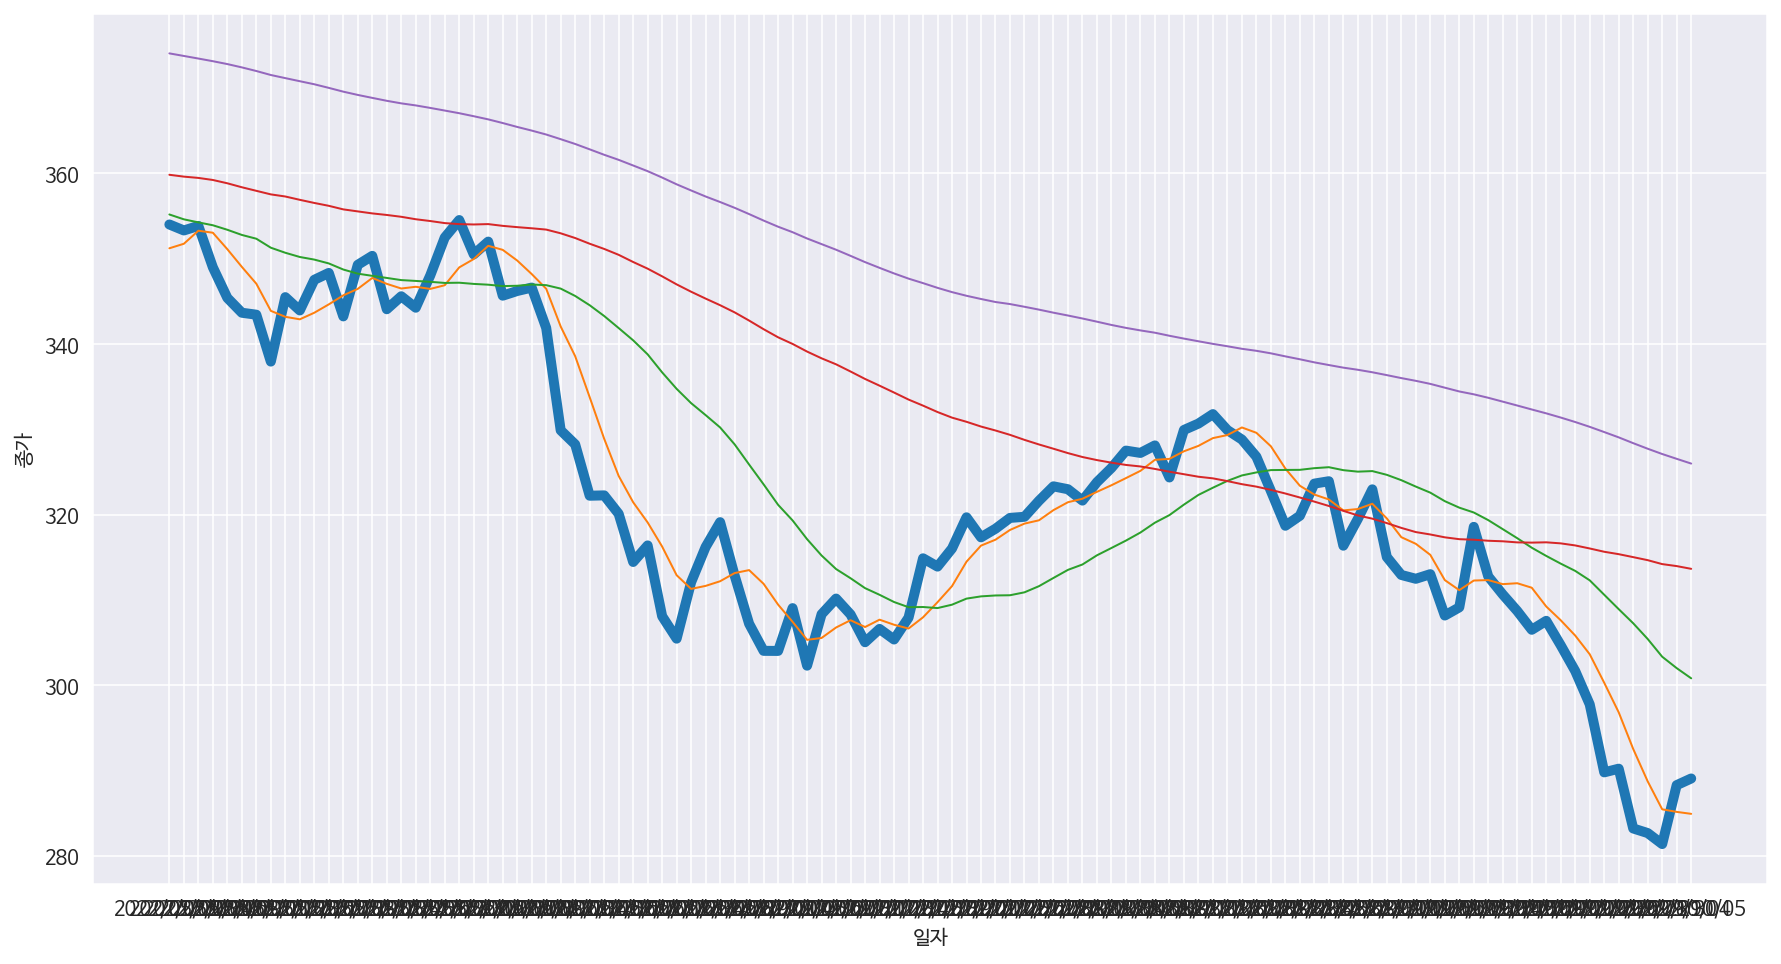

In [10]:
show_graph('종가', '2022/05/01')

In [11]:
# 이번엔 캔틀차트에 이동평균선을 넣어보겠습니다.
import mpl_finance

def show_candle(str_date):
    sub_data = 코스피200[코스피200['일자'] >= str_date]

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    # candlestick2_ohlc 함수를 사용하면
    # 많은 사람들이 좋아하는 캔들 차트로도 표시할 수 있습니다.
    mpl_finance.candlestick2_ohlc(ax, sub_data['시가'], sub_data['고가'], sub_data['저가'], sub_data['종가'], width=0.5, colorup='r', colordown='b')
    
    ax.plot(sub_data['일자'], sub_data['MA5'], label='MA5', linewidth=1)
    ax.plot(sub_data['일자'], sub_data['MA20'], label='MA20', linewidth=1)
    ax.plot(sub_data['일자'], sub_data['MA60'], label='MA60', linewidth=1)
    ax.plot(sub_data['일자'], sub_data['MA120'], label='MA120', linewidth=1)

c:\Users\User\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


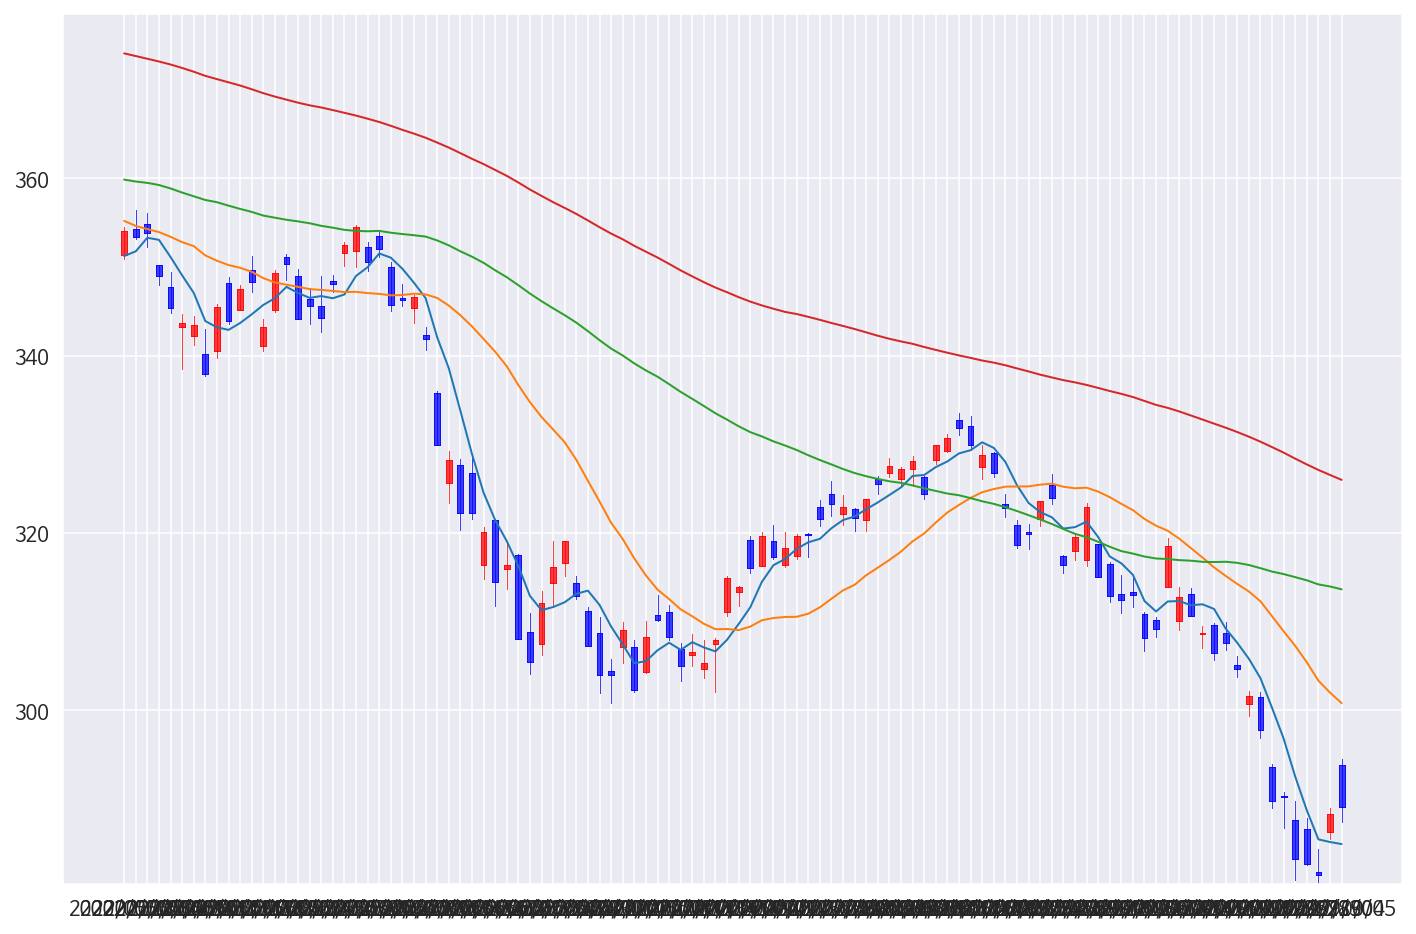

In [12]:
show_candle('2022/05/01')